# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [3]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [103]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Guayaquil'
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Ambato', 'Guayaquil']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

# Agregar la solucion en markdown (Informe)



\begin{equation*}
n =
\frac{b^{d+1}-1} {b-1}
\end{equation*}

\begin{equation*}
4 =
\frac{b^{16+1}-1} {b-1}
\end{equation*}


\begin{equation*}
4(b-1) =
{b^{17}-1}
\end{equation*}


\begin{equation*}
4b-4+1 =
{b^{17}}
\end{equation*}


\begin{equation*}
4b-3 =
{b^{17}}
\end{equation*}


\begin{equation*}
-3 =
{b^{17}-4b}
\end{equation*}


\begin{equation*}
{b^{17}-4b} = -3
\end{equation*}





## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de 
completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

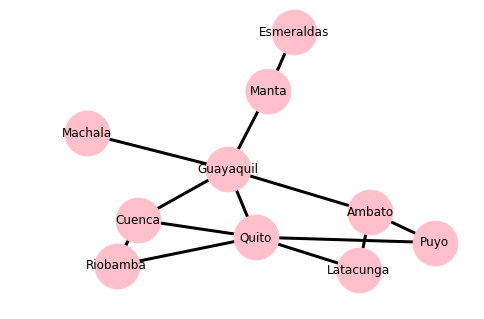

Nodos: 10 ['Cuenca', 'Riobamba', 'Quito', 'Guayaquil', 'Latacunga', 'Ambato', 'Esmeraldas', 'Manta', 'Puyo', 'Machala']


In [41]:
# Implementar
#Grafo

import  networkx as nx
import matplotlib.pyplot as plt


G=nx.Graph()

G.add_node("Cuenca",label='15')

G.add_nodes_from(["Riobamba","Quito","Guayaquil"])

G.add_edge("Cuenca", "Riobamba",label='8')
G.add_edge("Cuenca", "Quito",label ='2')
G.add_edge("Cuenca", "Guayaquil",label ='6')
G.add_edge("Riobamba","Cuenca",label ='4')
G.add_edge("Quito", "Cuenca",label ='6')
G.add_edge("Guayaquil", "Cuenca",label ='9')
G.add_edge("Latacunga", "Ambato",label ='12')
G.add_edge("Esmeraldas","Manta",label ='5')
G.add_edge("Manta", "Guayaquil",label ='3')
G.add_edge("Quito", "Riobamba",label ='4')
G.add_edge("Quito", "Latacunga",label ='12')
G.add_edge("Quito", "Cuenca",label ='8')
G.add_edge("Quito", "Guayaquil",label ='5')
G.add_edge("Quito", "Puyo",label ='2')
G.add_edge("Riobamba", "Cuenca",label ='9')
G.add_edge("Riobamba", "Quito",label ='6')
G.add_edge("Puyo", "Ambato",label ='7')
G.add_edge("Puyo", "Quito",label ='12')
G.add_edge("Machala", "Guayaquil",label ='2')
G.add_edge("Guayaquil", "Machala",label ='9')
G.add_edge("Guayaquil", "Ambato",label ='4')
G.add_edge("Guayaquil", "Quito",label ='9')
G.add_edge("Guayaquil", "Cuenca",label ='6')
G.add_edge("Guayaquil", "Manta",label ='12')

#Se dibuja
nx.draw(G, with_labels=True, node_size=2000,width=3,node_color='Pink')
#Pantalla
plt.show()

print("Nodos:", G.number_of_nodes(), G.nodes)




### Factor de ramificaicon

\begin{equation*}
n =
\frac{b^{d+1}-1} {b-1}
\end{equation*}


\begin{equation*}
n=
\frac{b^{17}-1}{b-1}  
\end{equation*}

Factorizamos la ecuacion 

\begin{equation*}
n= b^{17}-1 
\end{equation*}

 y Eliminamos (b-1)
\begin{equation*}
n=
\frac {(b-1){(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1)}}{b-1}  
\end{equation*}

Remplazamos los valores n=4 
\begin{equation*}
4=(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1)
\end{equation*}


\begin{equation*}
(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1)=4
\end{equation*}


\begin{equation*}
(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b+1-4)=4-4
\end{equation*}

\begin{equation*}
(b^{16}+ b^{15}+b^{14}+b^{13}+b^{12}+b^{11}+b^{10}+b^9+b^8+b^7+b^6+b^5+b^4+b^3+b^2+b-3)=0
\end{equation*}



In [92]:
# Implementar

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

    # Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo 
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)


if __name__ == "__main__":
    connections = {
        'Bolivia Zhalaou':{'Centro de salud de Azogues','Hospital Homero Castañer','Clinica San Jose'},
        'Centro de salud de Azogues':{'Cruz roja'},
        'Hospital Homero Castañer':{'Hospital de especialidaes CLEMED','Clinica Santa Marianitas','Bolivia Zhalaou'},
        'Clinica San Jose':{'Hospital San Martin','Hospital del IEES'},
        'Clinica Santa Marianitas':{'Hospital Homero Castañer', 'Clinica San Jose','Bolivia Zhalaou'},
        'Hospital del IEES':{'Hospital de especialidaes CLEMED'},
        'Hospital San Martin':{'Clinica Santa Marianitas','Hospital Homero Castañer'},
        'Hospital de especialidaes CLEMED':{'Clinica Santa Marianitas','Clinica San Jose','Bolivia Zhalaou'},
        'Cruz roja':{'Hospital de especialidaes CLEMED','Hospital Homero Castañer'}
        
        }

    init_state = 'Bolivia Zhalaou'
    solution = 'Clinica Santa Marianitas'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Bolivia Zhalaou', 'Hospital Homero Castañer', 'Clinica Santa Marianitas']


# Conclusiones

Dentro de la busqueda de amplitud es un algoritmo que va rrecorrieno 
La búsqueda por amplitud es un algoritmo que recorre elementos de un grafo,
se comienza por la raíz o estado inicial y se explora todos los hijos de este nodo hasta encontrar la solución o 
estado objetivo, no considera el costo del camino en km sino en saltos.
